<a href="https://colab.research.google.com/github/Rexoes/-dev-3/blob/main/AUE_TransferLearning_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Veri Setinin Google Colab'a Aktarılması ve Hazırlanması

**Dataset Link:** https://www.microsoft.com/en-us/download/details.aspx?id=54765

# 1.1. Google Drive Bağlantı

Veri setine ulaşmak ve modelleri kaydetmek için Google Drive'a bağlan!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**unrar** kullanarak cats_dogs veri setini çıkart.

In [ ]:
!apt-get install unrar

# RAR dosyasının yolu
rar_path = '/content/drive/MyDrive/AUE_TL_DogsCats/PetImages.rar'

# Çıkartılacak klasörün yolu
extract_path = '/content/drive/MyDrive/AUE_TL_DogsCats/dataset'

# RAR dosyasını çöz
!unrar x -r $rar_path $extract_path

PetImages kaynak veri seti içerisinde herbir kategorik veriden 12.500 adet olmak üzre Dog ve Cat klasörleri içerisinde yer alan veri setlerini kategori değerleri başlarına gelecek şekilde yeniden isimlendir ve bütün bu veri setlerini /train klasörü içerisine kopyala!

In [ ]:
import os
import shutil

# Orijinal veri seti yolu
original_path = '/content/drive/MyDrive/AUE_TL_DogsCats/dataset/PetImages'

# Yeni veri seti için hedef klasör
train_path = '/content/drive/MyDrive/AUE_TL_DogsCats/dataset/train'

# Hedef klasörü oluştur
if not os.path.exists(train_path):
    os.makedirs(train_path)

# Kategorileri belirle
categories = ['Cat', 'Dog']

valid_extensions = ['.jpg', '.jpeg', '.png']

def is_valid_file(file_name):
    return any(file_name.lower().endswith(ext) for ext in valid_extensions)


# Dosyaları yeniden isimlendir ve taşı
for category in categories:
    # Kategoriye ait orijinal dosya yolu
    original_category_path = os.path.join(original_path, category)

    # Tüm dosyaları oku
    files = os.listdir(original_category_path)

    # files2 = [f for f in os.listdir(original_category_path) if is_valid_file(f)]
    # print(f"{category} klasöründe geçerli dosya sayısı: {len(files)}")

    # Dosya sayısını kontrol et
    print(f"{category} klasöründe bulunan dosya sayısı: {len(files)}")

    # Yeniden isimlendir ve taşı
    for index, file_name in enumerate(files):
        # Eski dosya yolu
        old_file_path = os.path.join(original_category_path, file_name)

        # Yeni dosya adı ve yolu
        new_file_name = f"{category.lower()}.{index}.jpg"
        new_file_path = os.path.join(train_path, new_file_name)

        # Dosyayı yeni konuma kopyala
        try:
            shutil.copy2(old_file_path, new_file_path)
        except Exception as e:
            print(f"Dosya işlenirken hata oluştu: {old_file_path} - {e}")

print("Tüm dosyalar yeniden adlandırıldı ve taşındı!")

**Output;**

Cat klasöründe bulunan dosya sayısı: 12500

Dog klasöründe bulunan dosya sayısı: 12500

Tüm dosyalar yeniden adlandırıldı ve taşındı!

/train klasörü içerisinde yer alan veri seti adedini ve cat/dog kategorik veri seti adetlerini kontrol et!

In [ ]:
import os
import shutil

train_path = '/content/drive/MyDrive/AUE_TL_DogsCats/dataset/train'

# Tüm dosyaları oku
files = os.listdir(train_path)

# Toplam dosya sayısını yazdır
print(f"Toplam dosya sayısı: {len(files)}")

# Cat ve Dog dosyalarını ayır
cat_files = [f for f in files if f.startswith('cat.')]
dog_files = [f for f in files if f.startswith('dog.')]

# Cat ve Dog dosya sayısını yazdır
print(f"Cat dosya sayısı: {len(cat_files)}")
print(f"Dog dosya sayısı: {len(dog_files)}")

**Output;**

Toplam dosya sayısı: 25000

Cat dosya sayısı: 12500

Dog dosya sayısı: 12500

# 1.2. Veri Setlerinin Parçalanması

In [1]:
import glob
import numpy as np
import os
import shutil
np.random.seed(42)

In [ ]:
files = glob.glob('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/train/*')

cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
len(cat_files), len(dog_files)

**Output;**

(12500, 12500)

Model eğitiminde kullanmak için train - val - test veri setlerini rastgele olarak seç!

In [ ]:
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Train - Val - Test')
print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

**Output;**

Train - Val - Test

Cat datasets: (1500,) (500,) (500,)

Dog datasets: (1500,) (500,) (500,)


In [1]:
# Ayrılan bu veri setlerini train - val - test olmak üzere 3 klasör içerisine taşı!

train_dir = '/content/drive/MyDrive/AUE_TL_DogsCats/dataset/training_data'
val_dir = '/content/drive/MyDrive/AUE_TL_DogsCats/dataset/validation_data'
test_dir = '/content/drive/MyDrive/AUE_TL_DogsCats/dataset/test_data'

train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)

for fn in test_files:
    shutil.copy(fn, test_dir)

In [ ]:
# Bu klasörler içerisindeki veri set sayılarını tekrardan kontrol et!

# Train
files = os.listdir(train_dir)

# Toplam dosya sayısını yazdır
print(f"Training Data Klasöründe Toplam dosya sayısı: {len(files)}")

# Cat ve Dog dosyalarını ayır
cat_files = [f for f in files if f.startswith('cat.')]
dog_files = [f for f in files if f.startswith('dog.')]

# Cat ve Dog dosya sayısını yazdır
print(f"Cat dosya sayısı: {len(cat_files)}")
print(f"Dog dosya sayısı: {len(dog_files)}")


# Validate
files = os.listdir(val_dir)

# Toplam dosya sayısını yazdır
print(f"\nValidation Data Klasöründe Toplam dosya sayısı: {len(files)}")

# Cat ve Dog dosyalarını ayır
cat_files = [f for f in files if f.startswith('cat.')]
dog_files = [f for f in files if f.startswith('dog.')]

# Cat ve Dog dosya sayısını yazdır
print(f"Cat dosya sayısı: {len(cat_files)}")
print(f"Dog dosya sayısı: {len(dog_files)}")


# Test
files = os.listdir(test_dir)

# Toplam dosya sayısını yazdır
print(f"\nTest Data Klasöründe Toplam dosya sayısı: {len(files)}")

# Cat ve Dog dosyalarını ayır
cat_files = [f for f in files if f.startswith('cat.')]
dog_files = [f for f in files if f.startswith('dog.')]

# Cat ve Dog dosya sayısını yazdır
print(f"Cat dosya sayısı: {len(cat_files)}")
print(f"Dog dosya sayısı: {len(dog_files)}")

**Output;**

Training Data Klasöründe Toplam dosya sayısı: 3000
Cat dosya sayısı: 1500
Dog dosya sayısı: 1500

Validation Data Klasöründe Toplam dosya sayısı: 1000
Cat dosya sayısı: 500
Dog dosya sayısı: 500

Test Data Klasöründe Toplam dosya sayısı: 1000
Cat dosya sayısı: 500
Dog dosya sayısı: 500

# 1.3. Veri Ön İşleme

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

In [ ]:
# cat.1208.jpg veya dog.15.jpg şeklinde isimlendirilen veri setlerinden kategorik sınıf değerlerini elde et!

IMG_DIM = (150, 150)

train_files = glob.glob('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[7].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[7].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape,
      '\tValidation dataset shape:', validation_imgs.shape)

**Output;**

Train dataset shape: (3000, 150, 150, 3)

Validation dataset shape: (1000, 150, 150, 3)

In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

**Output;**

(150, 150, 3)

Köpek veya Kedi resim çıktısı.

In [ ]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

**Output;**

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]

# 2. Model Geliştirme

Gerekli değişkenler ve kütüphaneler!

In [7]:
import glob
import numpy as np
import pandas as pd
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

input_shape = (150, 150, 3)

IMG_DIM = (150, 150)

train_files = glob.glob('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[7].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[7].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape,
      '\tValidation dataset shape:', validation_imgs.shape)

train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [3]:
def plot_history(history, title, save_path=None):
    # Sabit dizin tanımı
    base_dir = "/content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model History Graphs/"



    # Grafiklerin boyutunu ayarla
    plt.figure(figsize=(12, 5))

    # Training ve Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy Value')
    plt.legend(loc='lower right')

    # Training ve Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.legend(loc='upper right')

    # Ana başlığı ekle
    plt.suptitle(title, fontsize=14, fontweight='bold')  # Ana başlık

    # Grafiklerin Kaydedilmesi
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Üstteki başlığa yer bırakmak için rect kullanıldı

    if save_path is None:
      print('Model History Grafiği kaydedilmedi!')
      plt.show()
    else:
      # Kaydedilecek tam yolun oluşturulması
        full_path = f"{base_dir}{save_path}.jpg"
        plt.savefig(full_path, format='jpg')  # JPG formatında kaydedilir
        print(f"Grafikler başarıyla kaydedildi: {save_path}")
        plt.show()

# 2.1. Simple CNN Model

In [5]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()
print(f"Model giriş şekli: {model.input_shape}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,024,513 (72.57 MB)

 Trainable params: 19,024,513 (72.57 MB)

 Non-trainable params: 0 (0.00 B)

Model giriş şekli: (None, 150, 150, 3)


In [7]:
batch_size = 30
num_classes = 2
epochs = 30

history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.5050 - loss: 1.0487 - val_accuracy: 0.5050 - val_loss: 0.6896
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5938 - loss: 0.6800 - val_accuracy: 0.5640 - val_loss: 0.6835
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6601 - loss: 0.6052 - val_accuracy: 0.6210 - val_loss: 0.6606
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7055 - loss: 0.5648 - val_accuracy: 0.6570 - val_loss: 0.6307
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7668 - loss: 0.4830 - val_accuracy: 0.7220 - val_loss: 0.5484
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7833 - loss: 0.4457 - val_accuracy: 0.7300 - val_loss: 0.5556
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8309 - loss: 0.3796 - val_accuracy: 0.7150 - val_loss: 0.6019
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8720 - loss: 0.2996 - val_accu

Grafikler başarıyla kaydedildi: cats_dogs_basic_cnn


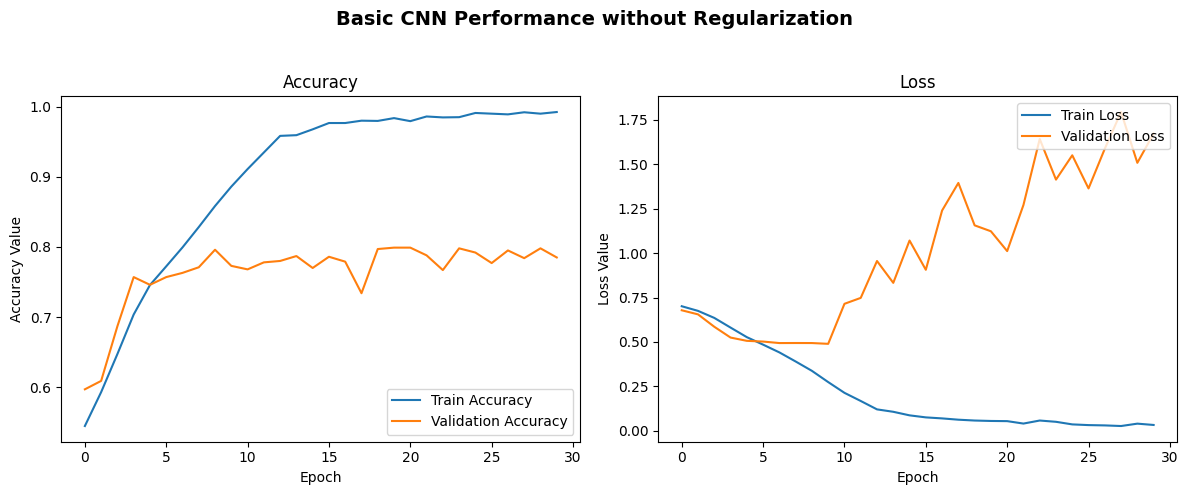

In [21]:
plot_history(history, title='Basic CNN Performance without Regularization', save_path='cats_dogs_basic_cnn')

# 2.2. CNN Model with Regularization

In [18]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()
print(f"Model giriş şekli: {model.input_shape}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 72, 72, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,113 (14.14 MB)

 Trainable params: 3,706,113 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

Model giriş şekli: (None, 150, 150, 3)


In [19]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5199 - loss: 0.7037 - val_accuracy: 0.5970 - val_loss: 0.6784
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5792 - loss: 0.6798 - val_accuracy: 0.6090 - val_loss: 0.6554
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6418 - loss: 0.6392 - val_accuracy: 0.6870 - val_loss: 0.5856
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6999 - loss: 0.5842 - val_accuracy: 0.7570 - val_loss: 0.5248
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7349 - loss: 0.5361 - val_accuracy: 0.7460 - val_loss: 0.5063
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7842 - loss: 0.4763 - val_accuracy: 0.7570 - val_loss: 0.5023
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7997 - loss: 0.4481 - val_accuracy: 0.7630 - val_loss: 0.4938
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8323 - loss: 0.3774 - val_accu

Grafikler başarıyla kaydedildi: cats_dogs_basic_cnn_reg


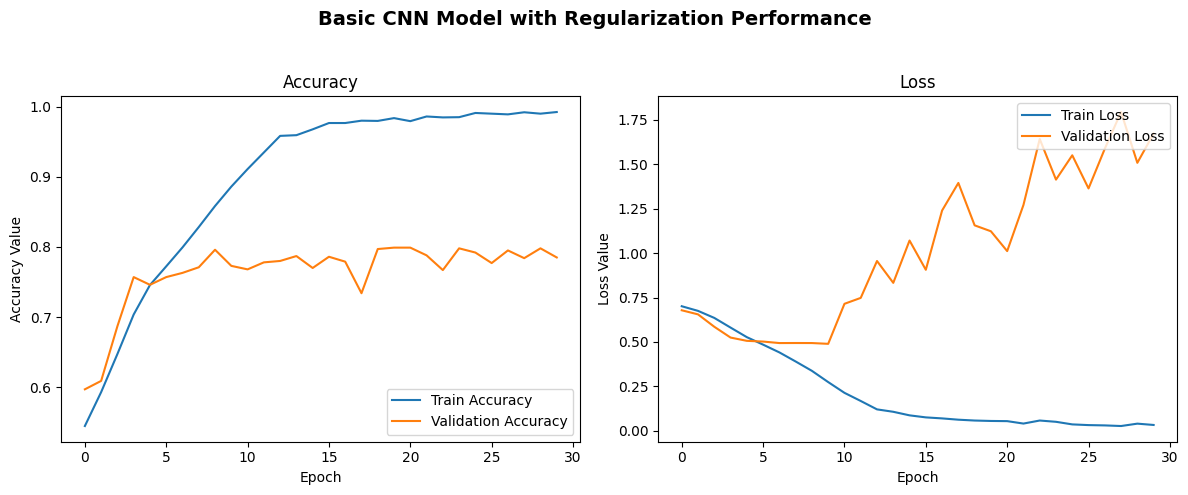

In [20]:
plot_history(history, title='Basic CNN Model with Regularization Performance', save_path='cats_dogs_basic_cnn_reg')

In [22]:
model.save('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/models/cats_dogs_basic_cnn.keras')

# 2.3. CNN Model with Image Augmentation

**Data Augmentation**

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


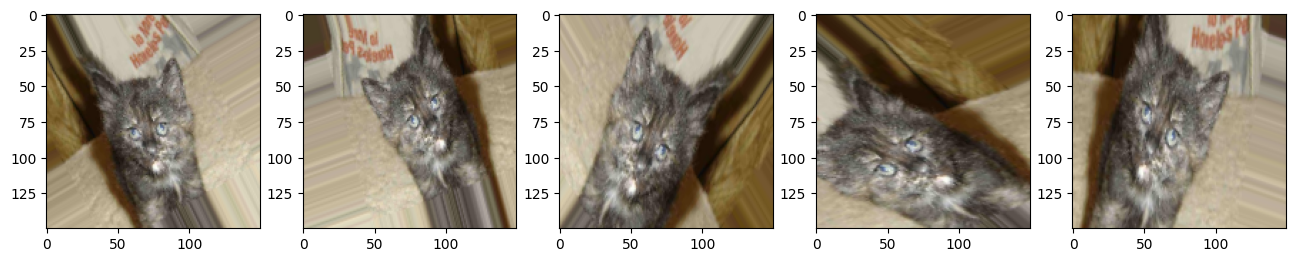

In [24]:
img_id = 2595
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


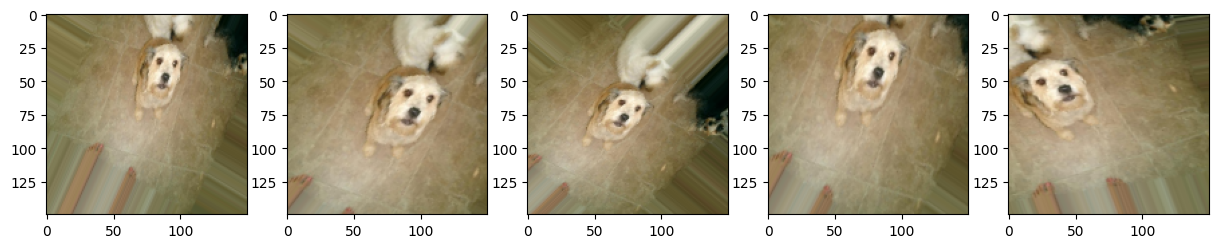

In [25]:
img_id = 500
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [26]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [28]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()
print(f"Model giriş şekli: {model.input_shape}")

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 72, 72, 64)          │           9,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,113 (14.14 MB)

 Trainable params: 3,706,113 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

Model giriş şekli: (None, 150, 150, 3)


In [29]:
# history = model.fit(train_generator, steps_per_epoch=100, epochs=100,
#                               validation_data=val_generator, validation_steps=50,
#                               verbose=1)

history = model.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.4995 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.5098 - loss: 0.6916 - val_accuracy: 0.5940 - val_loss: 0.6841
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 139ms/step - accuracy: 0.5622 - loss: 0.6865 - val_accuracy: 0.5970 - val_loss: 0.6737
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 136ms/step - accuracy: 0.5423 - loss: 0.6821 - val_accuracy: 0.5960 - val_loss: 0.6661
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 135ms/step - accuracy: 0.5804 - loss: 0.6774 - val_accuracy: 0.5510 - val_loss: 0.6846
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.5924 - loss: 0.6684 - val_accuracy: 0.6030 - val_loss: 0.6545
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.5881 - loss: 0.6640 - val_accuracy: 0.6110 - val_loss: 0.6474
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.6137 - loss: 0.656

Grafikler başarıyla kaydedildi: cats_dogs_cnn_img_aug


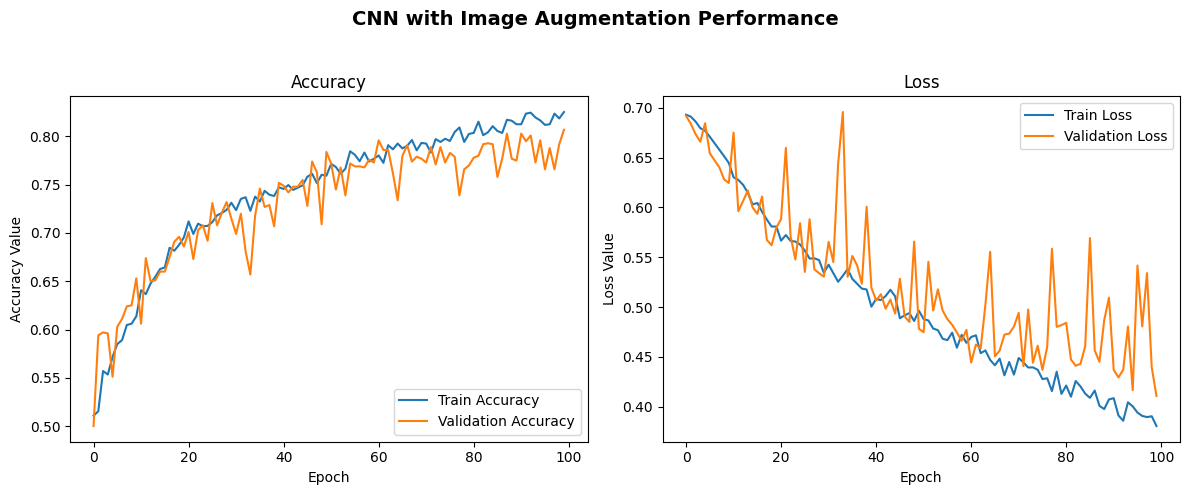

In [30]:
plot_history(history, title='CNN with Image Augmentation Performance', save_path='cats_dogs_cnn_img_aug')

In [31]:
model.save('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/models/cats_dogs_cnn_img_aug.keras')

# 2.4. Leveraging Transfer Learning with Pre-trained CNN Models

**VGG-16 Model;**

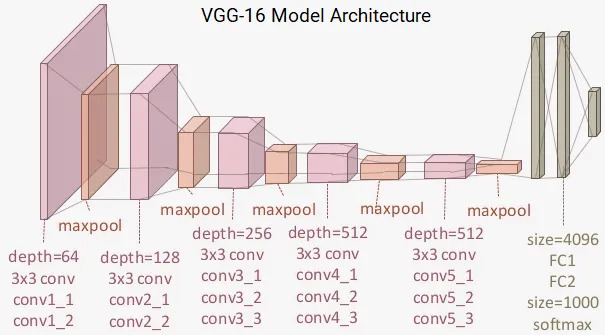

# 2.4.1. Pre-trained CNN model as a Feature Extractor

In [32]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet',
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

import pandas as pd
pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_5, built=True>",input_layer_5,False
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,False
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,False
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,False
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,False
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,False
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,False
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,False
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,False
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,False


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(1, 4, 4, 512)


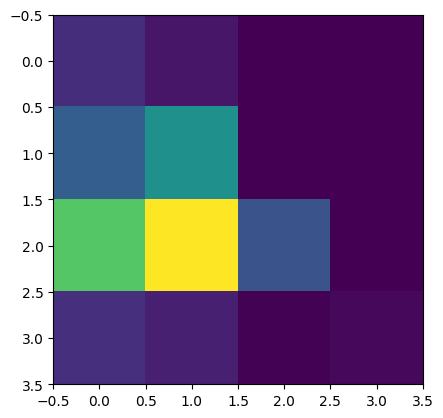

In [33]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [34]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape,
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


The preceding output tells us that we have successfully extracted the flattened bottleneck features of dimension 1 x 8192 for our 3,000 training images and our 1,000 validation images. Let’s build the architecture of our deep neural network classifier now, which will take these features as input.

In [36]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer

# input_shape = vgg_model.output_shape[1]
input_shape = train_features_vgg.shape[1]


# print(input_shape)

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

model.summary()
print(f"Model giriş şekli: {model.input_shape}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,457,985 (17.01 MB)

 Trainable params: 4,457,985 (17.01 MB)

 Non-trainable params: 0 (0.00 B)

Model giriş şekli: (None, 8192)


In [37]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7389 - loss: 0.5266 - val_accuracy: 0.8660 - val_loss: 0.3209
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8682 - loss: 0.3098 - val_accuracy: 0.8670 - val_loss: 0.2591
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8963 - loss: 0.2498 - val_accuracy: 0.8790 - val_loss: 0.2604
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9209 - loss: 0.1959 - val_accuracy: 0.8820 - val_loss: 0.2607
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9350 - loss: 0.1645 - val_accuracy: 0.8890 - val_loss: 0.2419
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9512 - loss: 0.1363 - val_accuracy: 0.8670 - val_loss: 0.3513
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: 0.1263 - val_accuracy: 0.8980 - val_loss: 0.2567
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9628 - loss: 0.0950 - val_accuracy: 0

Grafikler başarıyla kaydedildi: cats_dogs_tlearn_basic_cnn


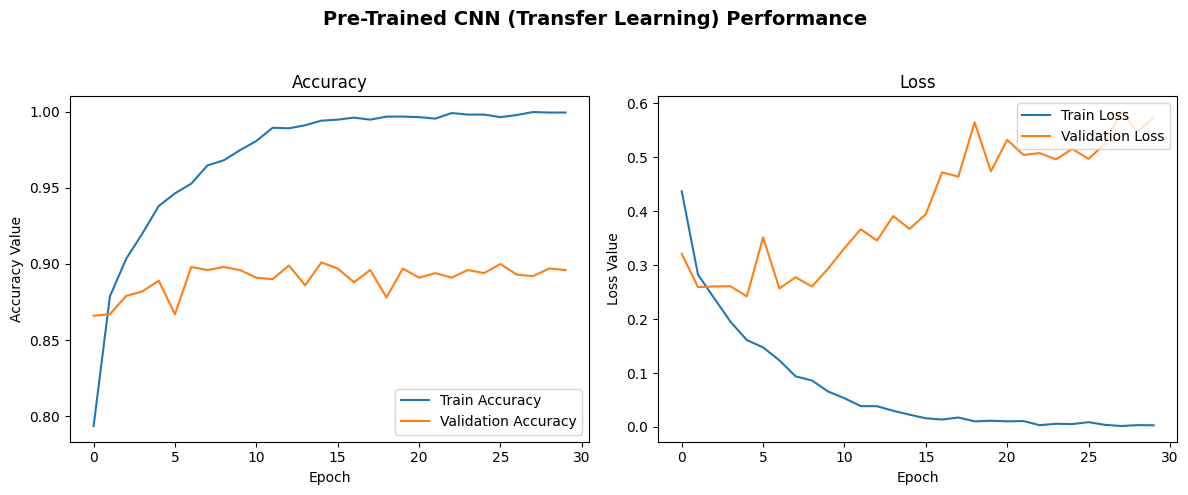

In [38]:
plot_history(history, title='Pre-Trained CNN (Transfer Learning) Performance', save_path='cats_dogs_tlearn_basic_cnn')

In [39]:
model.save('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/models/cats_dogs_tlearn_basic_cnn.keras')

# 2.4.1.1. Pre-trained CNN model as a Feature Extractor with Image Augmentation

In [40]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [41]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
#                               validation_data=val_generator, validation_steps=50,
#                               verbose=1)

history = model.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 225ms/step - accuracy: 0.5751 - loss: 0.6826 - val_accuracy: 0.7920 - val_loss: 0.4917
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.7180 - loss: 0.5626 - val_accuracy: 0.8090 - val_loss: 0.4170
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 163ms/step - accuracy: 0.7672 - loss: 0.4919 - val_accuracy: 0.8270 - val_loss: 0.3637
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.7719 - loss: 0.4712 - val_accuracy: 0.8450 - val_loss: 0.3468
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.7798 - loss: 0.4576 - val_accuracy: 0.8490 - val_loss: 0.3291
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.7857 - loss: 0.4338 - val_accuracy: 0.8540 - val_loss: 0.3107
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.7953 - loss: 0.4368 - val_accuracy: 0.8640 - val_loss: 0.2980
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 163ms/step - accuracy: 0.7906 - loss: 0.430

Grafikler başarıyla kaydedildi: cats_dogs_tlearn_img_aug_cnn


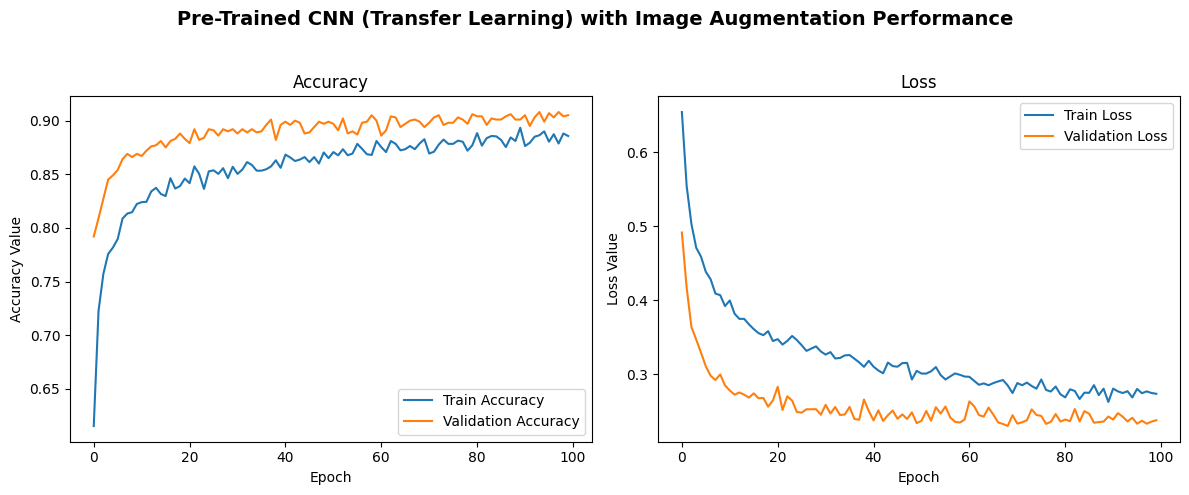

In [44]:
plot_history(history, title='Pre-Trained CNN (Transfer Learning) with Image Augmentation Performance', save_path='cats_dogs_tlearn_img_aug_cnn')

In [45]:
model.save('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/models/cats_dogs_tlearn_img_aug_cnn.keras')

# 2.5. Pre-trained CNN model with Fine-tuning and Image Augmentation

In [8]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet',
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_1, built=True>",input_layer_1,False
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,False
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,False
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,False
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,False
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,False
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,False
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,False
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,False
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,False


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [11]:
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_1 (Functional)            │ (None, 8192)                │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,172,673 (73.14 MB)

 Trainable params: 17,437,185 (66.52 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [13]:
# history = model.fit(train_generator, steps_per_epoch=100, epochs=100,
#                               validation_data=val_generator, validation_steps=50,
#                               verbose=1)

history = model.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 215ms/step - accuracy: 0.5885 - loss: 0.6675 - val_accuracy: 0.8710 - val_loss: 0.3201
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.8245 - loss: 0.3949 - val_accuracy: 0.8960 - val_loss: 0.2725
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 162ms/step - accuracy: 0.8496 - loss: 0.3443 - val_accuracy: 0.9100 - val_loss: 0.2354
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.8769 - loss: 0.2941 - val_accuracy: 0.9220 - val_loss: 0.1823
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 159ms/step - accuracy: 0.8886 - loss: 0.2560 - val_accuracy: 0.8950 - val_loss: 0.3061
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.9007 - loss: 0.2423 - val_accuracy: 0.9100 - val_loss: 0.2739
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.9098 - loss: 0.2175 - val_accuracy: 0.9300 - val_loss: 0.1710
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 162ms/step - accuracy: 0.9146 - loss: 0.198

Grafikler başarıyla kaydedildi: cats_dogs_tlearn_finetune_img_aug_cnn


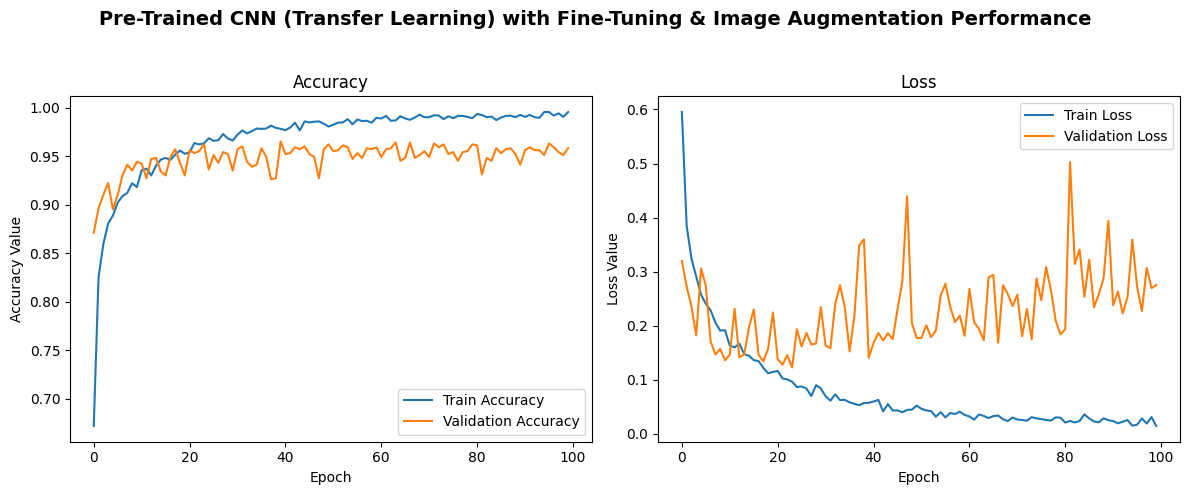

In [14]:
plot_history(history, title='Pre-Trained CNN (Transfer Learning) with Fine-Tuning & Image Augmentation Performance', save_path='cats_dogs_tlearn_finetune_img_aug_cnn')

In [15]:
model.save('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/models/cats_dogs_tlearn_finetune_img_aug_cnn.keras')

# 3. Evaluating our Deep Learning Models on Test Data

In [18]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
# import model_evaluation_utils as meu
%matplotlib inline

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def confusion_matrix_plot(model, test_data, test_labels, save_path=None):
  # """
  # Confusion Matrix'i hesaplar ve görselleştirir.

  # Args:
  #   model: Eğitilmiş Keras modeli.
  #   test_data: Test verileri.
  #   test_labels: Test etiketleri.
  # """

  # Sabit dizin tanımı
  base_dir = "/content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model Confusion Matrix/"

  # Tahminleri al
  predictions = model.predict(test_data)

  # Tahminleri ikili sınıflara dönüştür
  predicted_labels = (predictions > 0.5).astype(int)

  # Confusion Matrix'i hesapla
  cm = confusion_matrix(test_labels, predicted_labels)

  # Confusion Matrix'i görselleştir
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
  plt.xlabel('Tahmin Edilen Etiket')
  plt.ylabel('Gerçek Etiket')
  # plt.title('Confusion Matrix')
  plt.title(f"{save_path} Confusion Matrix")

  # # Ana başlığı ekle
  # plt.suptitle(save_path, fontsize=14, fontweight='bold')  # Ana başlık

  # # Grafiklerin Kaydedilmesi
  # plt.tight_layout(rect=[0, 0, 1, 0.95])  # Üstteki başlığa yer bırakmak için rect kullanıldı

  if save_path:
    # Kaydedilecek tam yolun oluşturulması
    full_path = f"{base_dir}{save_path}.jpg"
    plt.savefig(full_path, format='jpg')  # JPG formatında kaydedilir

    print(f"Confusion Matrix grafiği {full_path} konumuna kaydedildi.")

  plt.show()

def plot_roc_curve(model, test_imgs_scaled, test_labels_enc, save_path=None):  # Change the function name
  # Sabit dizin tanımı
  base_dir = "/content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model ROC Curve Graphs/"

  y_pred = model.predict(test_imgs_scaled)

  fpr, tpr, thresholds = roc_curve(test_labels_enc, y_pred) # This now refers to the correct function
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (alan = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")

  if save_path:
    # Kaydedilecek tam yolun oluşturulması
    full_path = f"{base_dir}{save_path}.jpg"
    plt.savefig(full_path, format='jpg')  # JPG formatında kaydedilir

    print(f"ROC Curve grafiği {full_path} konumuna kaydedildi.")

  plt.show()

def evaluate_model(model, X_test, y_test, class_names):
    # Modelin tahminlerini alın
    predictions = model.predict(X_test)
    y_pred = (predictions > 0.5).astype(int).flatten()  # Sigmoid çıkışını sınıflandırmaya dönüştür

    # y_test zaten binary olduğu için direk kullanabiliriz
    y_true = y_test

    # Karışıklık matrisi
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Sınıflandırma raporu
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("\nClassification Report:")
    print(report)

In [19]:
# load saved models
basic_cnn = load_model('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/models/cats_dogs_basic_cnn.keras')
img_aug_cnn = load_model('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/models/cats_dogs_cnn_img_aug.keras')
tl_cnn = load_model('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/models/cats_dogs_tlearn_basic_cnn.keras')
tl_img_aug_cnn = load_model('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/models/cats_dogs_tlearn_img_aug_cnn.keras')
tl_img_aug_finetune_cnn = load_model('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/models/cats_dogs_tlearn_finetune_img_aug_cnn.keras')

In [20]:
# load other configurations
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

In [21]:
# load VGG model for bottleneck features
from keras.applications import vgg16
from keras.models import Model
import keras

In [22]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet',
                  input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

In [24]:
IMG_DIM = (150, 150)

test_files = glob.glob('/content/drive/MyDrive/AUE_TL_DogsCats/dataset/test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[7].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = class2num_label_transformer(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (1000, 150, 150, 3)
['cat', 'cat', 'cat', 'cat', 'cat'] [0, 0, 0, 0, 0]


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix:
[[379 121]
 [ 95 405]]

Classification Report:
              precision    recall  f1-score   support

         cat       0.80      0.76      0.78       500
         dog       0.77      0.81      0.79       500

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix grafiği /content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model Confusion Matrix/basic_cnn.jpg konumuna kaydedildi.


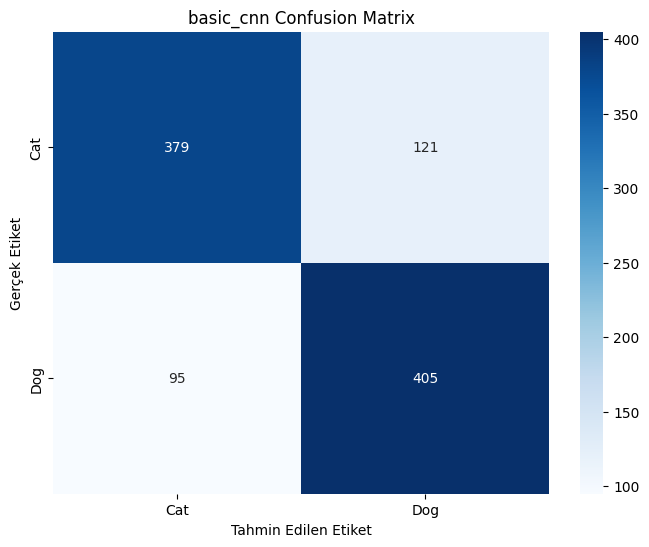

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
ROC Curve grafiği /content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model ROC Curve Graphs/basic_cnn.jpg konumuna kaydedildi.


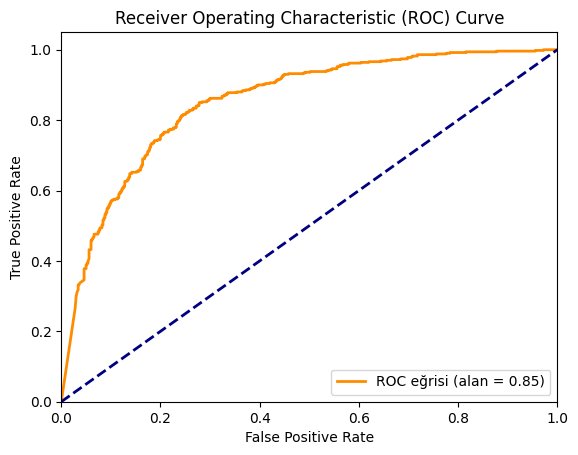

In [70]:
# predictions = basic_cnn.predict(test_imgs_scaled, verbose=1)
# predictions = num2class_label_transformer(predictions)

target_names = ['cat', 'dog']

evaluate_model(model=basic_cnn, X_test=test_imgs_scaled, y_test=test_labels_enc, class_names=target_names)

confusion_matrix_plot(basic_cnn, test_imgs_scaled, validation_labels_enc, save_path='basic_cnn')

plot_roc_curve(model=basic_cnn, test_imgs_scaled=test_imgs_scaled, test_labels_enc=test_labels_enc, save_path='basic_cnn')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix:
[[393 107]
 [ 73 427]]

Classification Report:
              precision    recall  f1-score   support

         cat       0.84      0.79      0.81       500
         dog       0.80      0.85      0.83       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix grafiği /content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model Confusion Matrix/img_aug_cnn.jpg konumuna kaydedildi.


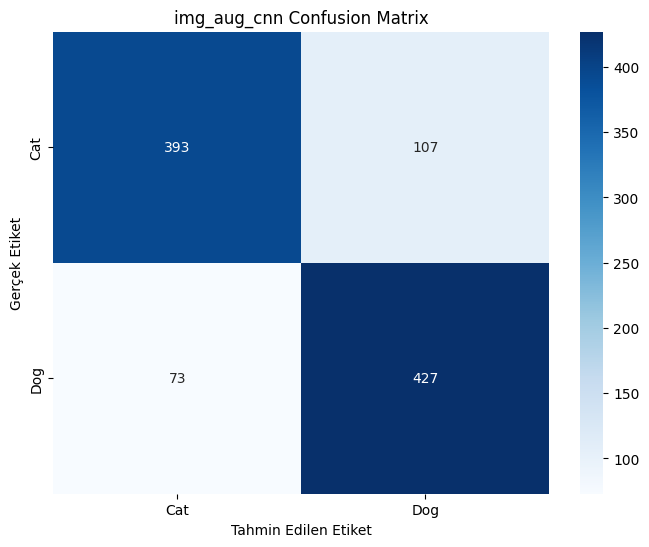

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
ROC Curve grafiği /content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model ROC Curve Graphs/img_aug_cnn.jpg konumuna kaydedildi.


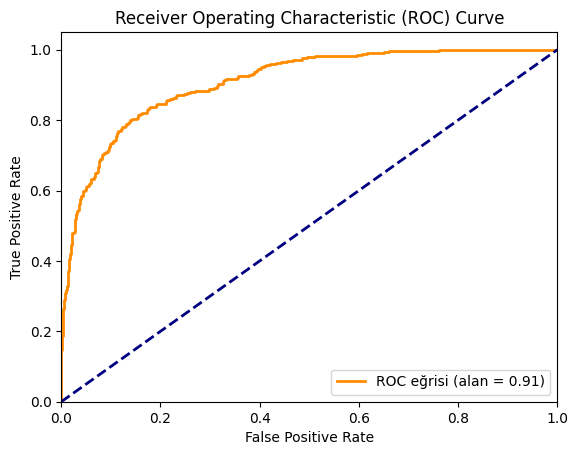

In [71]:
evaluate_model(model=img_aug_cnn, X_test=test_imgs_scaled, y_test=test_labels_enc, class_names=target_names)

confusion_matrix_plot(img_aug_cnn, test_imgs_scaled, validation_labels_enc, save_path='img_aug_cnn')

plot_roc_curve(model=img_aug_cnn, test_imgs_scaled=test_imgs_scaled, test_labels_enc=test_labels_enc, save_path='img_aug_cnn')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
[[434  66]
 [ 47 453]]

Classification Report:
              precision    recall  f1-score   support

         cat       0.90      0.87      0.88       500
         dog       0.87      0.91      0.89       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix grafiği /content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model Confusion Matrix/tl_cnn.jpg konumuna kaydedildi.


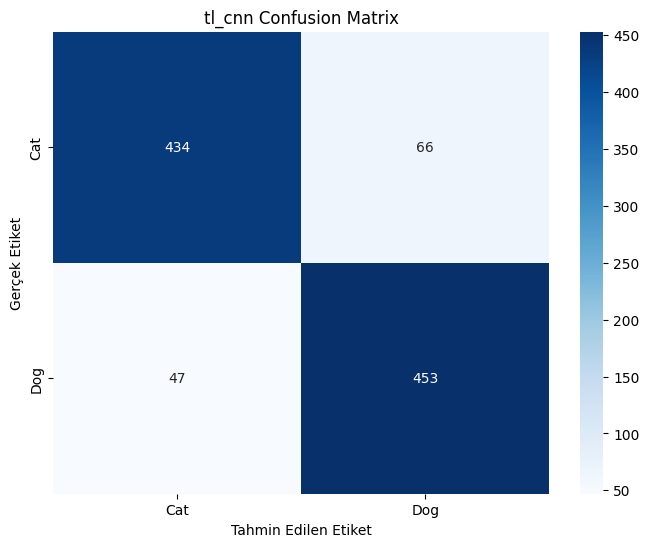

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ROC Curve grafiği /content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model ROC Curve Graphs/tl_cnn.jpg konumuna kaydedildi.


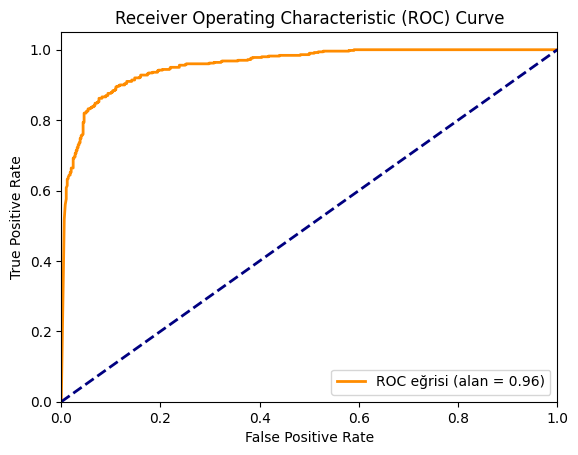

In [72]:
test_features = get_bottleneck_features(vgg_model, test_imgs_scaled)


evaluate_model(model=tl_cnn, X_test=test_features, y_test=test_labels_enc, class_names=target_names)

confusion_matrix_plot(tl_cnn, test_features, validation_labels_enc, save_path='tl_cnn')

plot_roc_curve(model=tl_cnn, test_imgs_scaled=test_features, test_labels_enc=test_labels_enc, save_path='tl_cnn')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
Confusion Matrix:
[[444  56]
 [ 39 461]]

Classification Report:
              precision    recall  f1-score   support

         cat       0.92      0.89      0.90       500
         dog       0.89      0.92      0.91       500

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.90      1000
weighted avg       0.91      0.91      0.90      1000

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
Confusion Matrix grafiği /content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model Confusion Matrix/tl_img_aug_cnn.jpg konumuna kaydedildi.


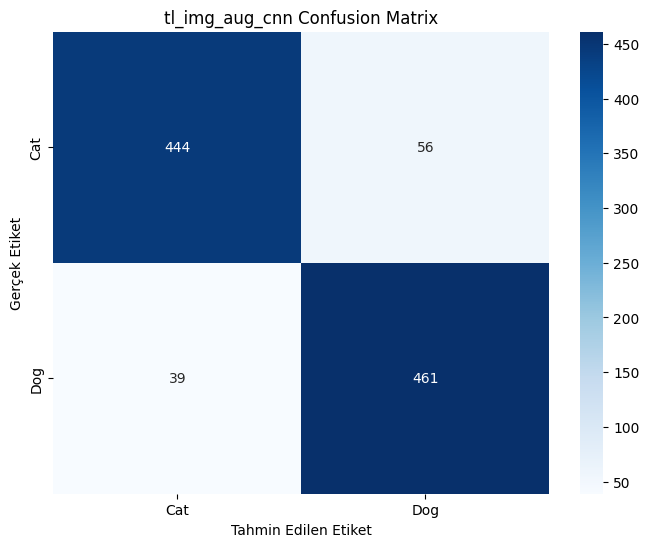

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
ROC Curve grafiği /content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model ROC Curve Graphs/tl_img_aug_cnn.jpg konumuna kaydedildi.


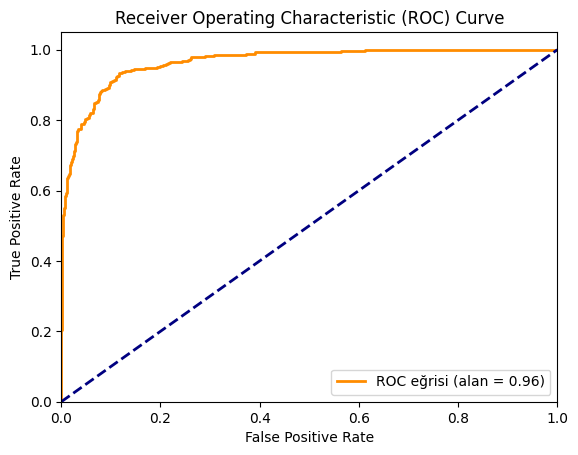

In [73]:
evaluate_model(model=tl_img_aug_cnn, X_test=test_imgs_scaled, y_test=test_labels_enc, class_names=target_names)

confusion_matrix_plot(tl_img_aug_cnn, test_imgs_scaled, validation_labels_enc, save_path='tl_img_aug_cnn')

plot_roc_curve(model=tl_img_aug_cnn, test_imgs_scaled=test_imgs_scaled, test_labels_enc=test_labels_enc, save_path='tl_img_aug_cnn')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
Confusion Matrix:
[[473  27]
 [ 14 486]]

Classification Report:
              precision    recall  f1-score   support

         cat       0.97      0.95      0.96       500
         dog       0.95      0.97      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
Confusion Matrix grafiği /content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model Confusion Matrix/tl_img_aug_finetune_cnn.jpg konumuna kaydedildi.


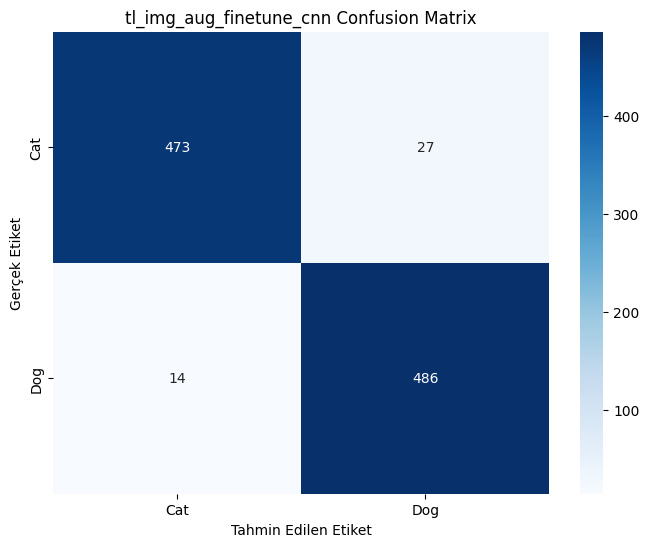

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
ROC Curve grafiği /content/drive/MyDrive/AUE_TL_DogsCats/dataset/Model ROC Curve Graphs/tl_img_aug_finetune_cnn.jpg konumuna kaydedildi.


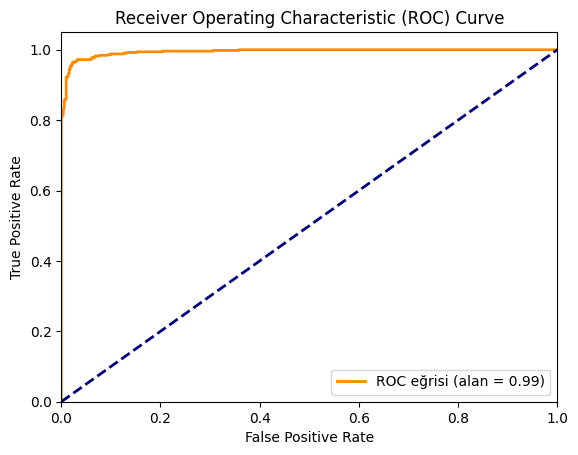

In [74]:
evaluate_model(model=tl_img_aug_finetune_cnn, X_test=test_imgs_scaled, y_test=test_labels_enc, class_names=target_names)

confusion_matrix_plot(tl_img_aug_finetune_cnn, test_imgs_scaled, validation_labels_enc, save_path='tl_img_aug_finetune_cnn')

plot_roc_curve(model=tl_img_aug_finetune_cnn, test_imgs_scaled=test_imgs_scaled, test_labels_enc=test_labels_enc, save_path='tl_img_aug_finetune_cnn')